In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pandas_datareader import data

# 그래프에 대한 기본설정
# plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 20, 10
plt.rcParams['font.size'] = 16
plt.rcParams['axes.unicode_minus'] = False

### 데이터 읽어오기

In [2]:
# 구분자 탭으로 되어 있으므로 구분자를 지정한다.
chipo = pd.read_csv('data/chipotle.tsv', sep='\t')
chipo

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


In [3]:
# 데이터 프레임의 정보
chipo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


In [4]:
# 결측치 확인
chipo.isna().sum()

order_id                 0
quantity                 0
item_name                0
choice_description    1246
item_price               0
dtype: int64

In [5]:
# 컬럼명 확인
chipo.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

In [6]:
# 인덱스 확인
chipo.index

RangeIndex(start=0, stop=4622, step=1)

### 범위형 데이터에 대한 이상치 확인

In [7]:
# 범위형 데이터에 대한 요약 통계 정보를 구한다.
# item_price가 나오지 않았다는 것은 문자열에 해당한다는 의미이다.
chipo[['order_id', 'quantity', 'item_price']].describe()

,order_id,quantity
count,4622.000000,4622.000000
mean,927.254868,1.075725
std,528.890796,0.410186
min,1.000000,1.000000
25%,477.250000,1.000000
50%,926.000000,1.000000
75%,1393.000000,1.000000
max,1834.000000,15.000000


In [8]:
# item_price 확인
chipo['item_price'].dtype

dtype('O')

In [9]:
# $를 제외하고 실수형으로 변환한다.
chipo['item_price2'] = chipo['item_price'].str[1:]
chipo['item_price2'] = chipo['item_price2'].astype('float64')
chipo['item_price2']

0        2.39
1        3.39
2        3.39
3        2.39
4       16.98
        ...  
4617    11.75
4618    11.75
4619    11.25
4620     8.75
4621     8.75
Name: item_price2, Length: 4622, dtype: float64

In [10]:
# 다시 확인한다.
# min과 max를 통해 최소 최대를 확인하여 이상치 존재 여부를 확인한다.
chipo[['order_id', 'quantity', 'item_price2']].describe()

,order_id,quantity,item_price2
count,4622.000000,4622.000000,4622.000000
mean,927.254868,1.075725,7.464336
std,528.890796,0.410186,4.245557
min,1.000000,1.000000,1.090000
25%,477.250000,1.000000,3.390000
50%,926.000000,1.000000,8.750000
75%,1393.000000,1.000000,9.250000
max,1834.000000,15.000000,44.250000


In [11]:
# 직접 통계량을 구해 확인한다.
chipo[['order_id', 'quantity', 'item_price2']].agg(['min', 'max'])

,order_id,quantity,item_price2
min,1,1,1.09
max,1834,15,44.25


### 카테고리형 데이터의 종류 확인

In [12]:
chipo['item_name'].value_counts().index

Index(['Chicken Bowl', 'Chicken Burrito', 'Chips and Guacamole',
       'Steak Burrito', 'Canned Soft Drink', 'Steak Bowl', 'Chips',
       'Bottled Water', 'Chicken Soft Tacos', 'Chips and Fresh Tomato Salsa',
       'Chicken Salad Bowl', 'Canned Soda', 'Side of Chips', 'Veggie Burrito',
       'Barbacoa Burrito', 'Veggie Bowl', 'Carnitas Bowl', 'Barbacoa Bowl',
       'Carnitas Burrito', 'Steak Soft Tacos', '6 Pack Soft Drink',
       'Chips and Tomatillo Red Chili Salsa', 'Chicken Crispy Tacos',
       'Chips and Tomatillo Green Chili Salsa', 'Carnitas Soft Tacos',
       'Steak Crispy Tacos', 'Chips and Tomatillo-Green Chili Salsa',
       'Steak Salad Bowl', 'Nantucket Nectar', 'Barbacoa Soft Tacos',
       'Chips and Roasted Chili Corn Salsa', 'Izze',
       'Chips and Tomatillo-Red Chili Salsa', 'Veggie Salad Bowl',
       'Chips and Roasted Chili-Corn Salsa', 'Barbacoa Crispy Tacos',
       'Barbacoa Salad Bowl', 'Chicken Salad', 'Veggie Soft Tacos',
       'Carnitas Crispy Tac

In [13]:
# 컬럼내에서 중복을 제외하고 데이터를 가져온다.
chipo['item_name'].unique()

array(['Chips and Fresh Tomato Salsa', 'Izze', 'Nantucket Nectar',
       'Chips and Tomatillo-Green Chili Salsa', 'Chicken Bowl',
       'Side of Chips', 'Steak Burrito', 'Steak Soft Tacos',
       'Chips and Guacamole', 'Chicken Crispy Tacos',
       'Chicken Soft Tacos', 'Chicken Burrito', 'Canned Soda',
       'Barbacoa Burrito', 'Carnitas Burrito', 'Carnitas Bowl',
       'Bottled Water', 'Chips and Tomatillo Green Chili Salsa',
       'Barbacoa Bowl', 'Chips', 'Chicken Salad Bowl', 'Steak Bowl',
       'Barbacoa Soft Tacos', 'Veggie Burrito', 'Veggie Bowl',
       'Steak Crispy Tacos', 'Chips and Tomatillo Red Chili Salsa',
       'Barbacoa Crispy Tacos', 'Veggie Salad Bowl',
       'Chips and Roasted Chili-Corn Salsa',
       'Chips and Roasted Chili Corn Salsa', 'Carnitas Soft Tacos',
       'Chicken Salad', 'Canned Soft Drink', 'Steak Salad Bowl',
       '6 Pack Soft Drink', 'Chips and Tomatillo-Red Chili Salsa', 'Bowl',
       'Burrito', 'Crispy Tacos', 'Carnitas Crispy Tacos

In [14]:
# 중복을 제외한 데이터의 개수
len(chipo['item_name'].unique())

50

### 가장 많이 주문한 item 파악하기

In [15]:
# item 당 주문 횟수를 파악한다.
order_count = chipo.groupby('item_name')['order_id'].count()
order_count.sort_values(ascending=False)

item_name
Chicken Bowl                             726
Chicken Burrito                          553
Chips and Guacamole                      479
Steak Burrito                            368
Canned Soft Drink                        301
Steak Bowl                               211
Chips                                    211
Bottled Water                            162
Chicken Soft Tacos                       115
Chicken Salad Bowl                       110
Chips and Fresh Tomato Salsa             110
Canned Soda                              104
Side of Chips                            101
Veggie Burrito                            95
Barbacoa Burrito                          91
Veggie Bowl                               85
Carnitas Bowl                             68
Barbacoa Bowl                             66
Carnitas Burrito                          59
Steak Soft Tacos                          55
6 Pack Soft Drink                         54
Chips and Tomatillo Red Chili Salsa       48


In [16]:
# item 당 주문 총량을 구한다.
item_quantity = chipo.groupby('item_name')['quantity'].sum()
item_quantity.sort_values(ascending=False)

item_name
Chicken Bowl                             761
Chicken Burrito                          591
Chips and Guacamole                      506
Steak Burrito                            386
Canned Soft Drink                        351
Chips                                    230
Steak Bowl                               221
Bottled Water                            211
Chips and Fresh Tomato Salsa             130
Canned Soda                              126
Chicken Salad Bowl                       123
Chicken Soft Tacos                       120
Side of Chips                            110
Veggie Burrito                            97
Barbacoa Burrito                          91
Veggie Bowl                               87
Carnitas Bowl                             71
Barbacoa Bowl                             66
Carnitas Burrito                          60
Steak Soft Tacos                          56
6 Pack Soft Drink                         55
Chips and Tomatillo Red Chili Salsa       50


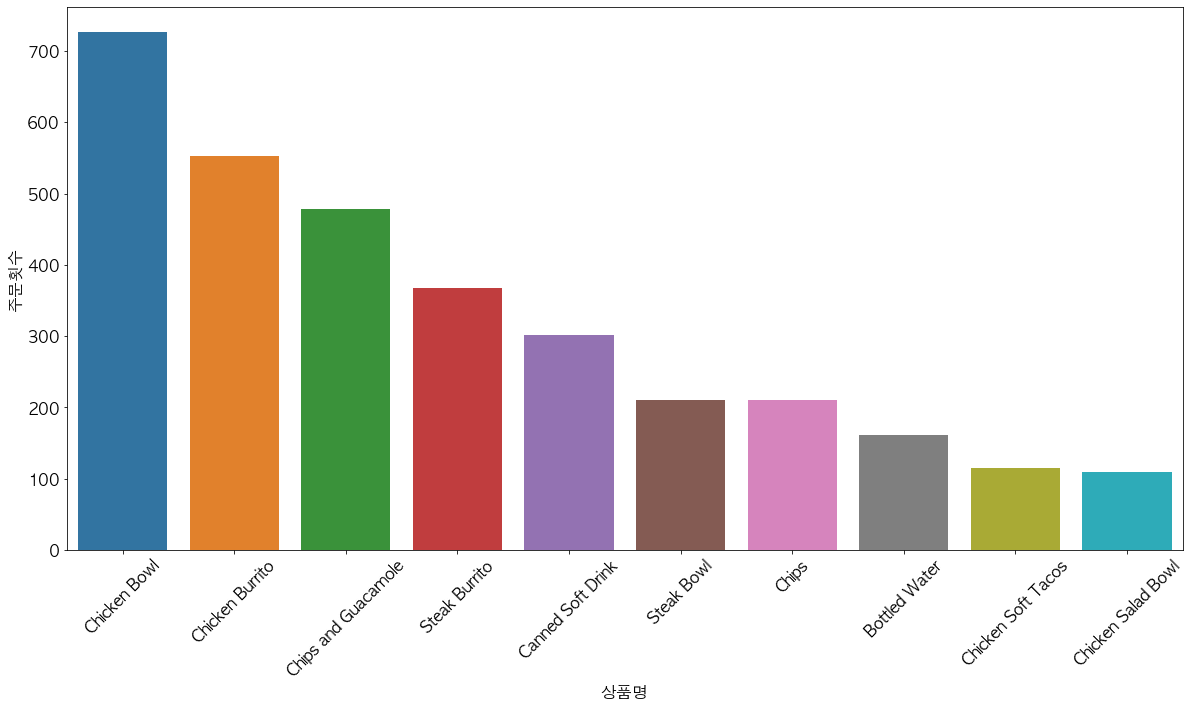

In [17]:
# 각 상품별 주문 횟수
order_count = order_count.sort_values(ascending=False)

# 시각화를 위해 데이터 프레임을 생성한다.
temp_df = pd.DataFrame(order_count)
# display(temp_df)

# 인덱스를 컬럼에 포함시킨다.
temp_df.reset_index(inplace=True)
# display(temp_df)

# 컬럼 이름을 변경한다.
temp_df.columns = ['상품명', '주문횟수']
# display(temp_df)

# 너무 많아서 상위 10개만 시각화한다.
sns.barplot(data=temp_df[:10], x='상품명', y='주문횟수')
plt.xticks(rotation=45)
plt.show()

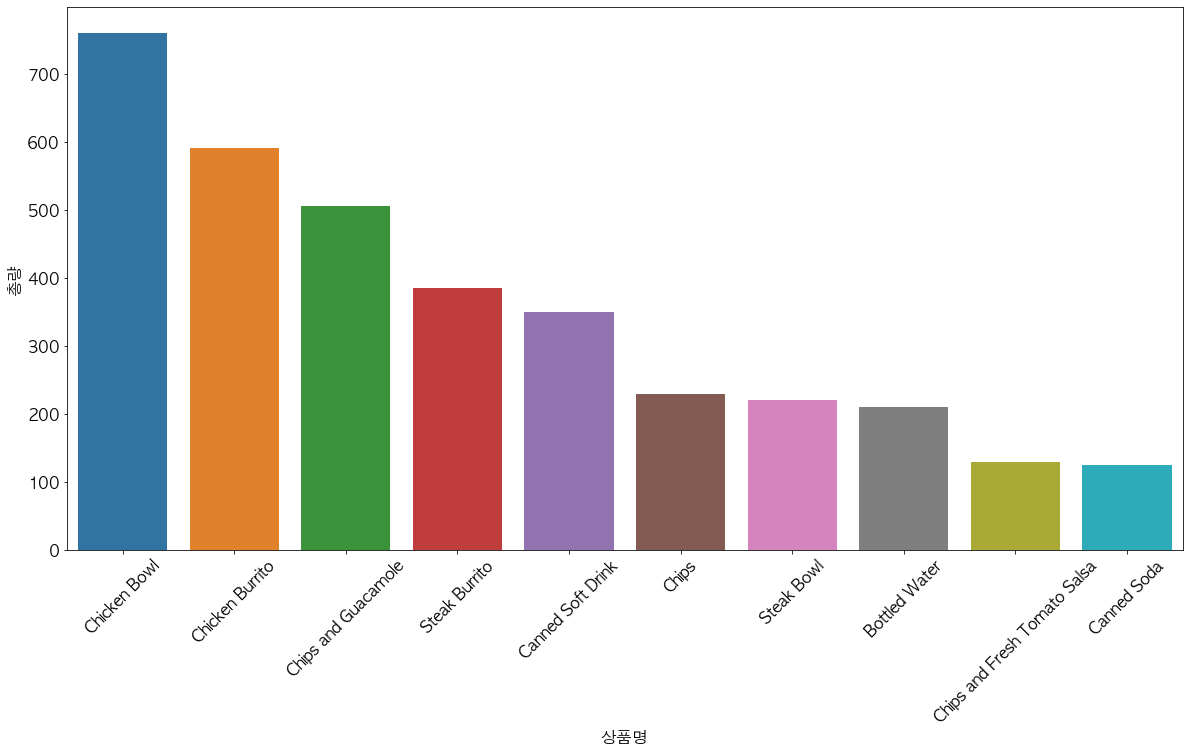

In [18]:
# 주문 총량 
item_quantity = item_quantity.sort_values(ascending=False)

# 데이터 프레임으로 생성한다.
temp_df = pd.DataFrame(item_quantity)

# 인덱스를 컬럼에 포함시킨다.
temp_df = temp_df.reset_index()

# 컬럼명을 변경한다.
temp_df.columns = ['상품명', '총량']

sns.barplot(data=temp_df[:10], x='상품명', y='총량')
plt.xticks(rotation=45)
plt.show()

### apply와 lambda 함수를 이용한 데이터 처리

In [19]:
# 각 행의 item_anme의 길이를 가져온다.
a1 = chipo['item_name'].apply(lambda x : len(x))
a1

0       28
1        4
2       16
3       37
4       12
        ..
4617    13
4618    13
4619    18
4620    18
4621    18
Name: item_name, Length: 4622, dtype: int64

### 문제
- 주문당 평균 계산 금액 출력
- 한 주문에 10달러 이상 사용한 주문의 id를 출력한다.
- 각 아이템의 가격 구하기(같은 아이템이지만 추가 주문이 있을 경우 가격이 올라간다. 이 때는 평균가를 결과로 한다.)
- 가장 비싼 주문에서 item이 몇개 팔렸는지..
- Vaggie Salad Bowl 이 몇번 주문 되었지(총량X, 주문 횟수)...
- Chiken Bowl을 2개 이상 주문한 주문 횟수 구하기